In [2]:
%load_ext autoreload
%autoreload 2

import os
from itertools import count

import contextily as cx
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import geopandas
import osmnx as ox
import pandas as pd
# from tqdm.auto import tqdm
from libpysal.cg import voronoi_frames

import shapely
shapely.speedups.disable()

DATA = "data"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
G = nx.read_gpickle(os.path.join(DATA, "shortest_paths.gpickle"))

In [5]:
edges = G.edges()
print(f"Liczba krawędzi {len(edges)}")

Liczba krawędzi 116896


In [7]:
nodes = G.nodes()
print(f"Liczba wierzchołków {len(nodes)}")

Liczba wierzchołków 86564


In [9]:
degrees = []
for node in nodes:
    degree = G.degree(node)
    degrees.append(degree)

<BarContainer object of 24 artists>

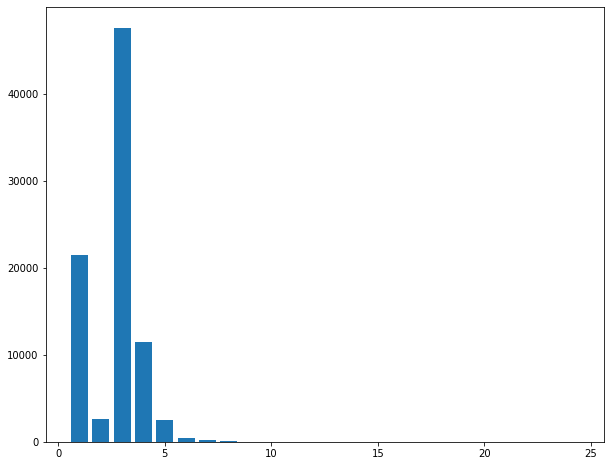

In [10]:
plt.figure(figsize=[10,8])
from collections import Counter

degree_counts = Counter(degrees)
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())

plot_x = list(range(min_degree, max_degree + 1))
plot_y = [degree_counts.get(x, 0) for x in plot_x]

plt.bar(plot_x, plot_y)

In [12]:
print(f"Liczba komponentów: {nx.number_connected_components(G)}")

Liczba komponentów: 1


In [13]:
diameter = nx.diameter(G)
print(f"Średnica grafu wynosi: {diameter}")

Średnica grafu wynosi: 165


In [37]:
G2 = nx.DiGraph(G)

betweenness = nx.centrality.betweenness_centrality(G2)
highest_betweenness_node = max(G2.nodes, key=betweenness.get)
plt.hist(betweenness.values())
plt.show()


print(f"Highest betweeness node is {highest_betweenness_node}")

In [35]:
eccentricity  = nx.algorithms.distance_measures.eccentricity(G)
highest_eccentricity_node  = max(G.nodes, key=eccentricity.get)
highest_eccentricity_node 

1098288328

In [ ]:
z podziałem na sieci czerwona, i reszte

z podziałem na sieci czerwona, i reszte
czerwona siec -> liczba komponentow
centralny wierzcholek z istniejacymy i bez
zidentyfikowac maxy

In [18]:
G_nodes, G_streets = ox.graph_to_gdfs(G)

G_nodes = G_nodes.to_crs(epsg=2177)
G_streets = G_streets.to_crs(epsg=2177)

## Tylko ścieki rowerowe, ktore istnieja (czerwone)

In [19]:
G_bike = G_streets[G_streets['type'] == 'bike_path'] # czerwony

In [23]:
bike_paths = nx.Graph(((u, v, e) for u,v,e in G.edges(data=True) if e['type'] == 'bike_path'))
bike_paths

In [26]:
edges = bike_paths.edges()
print(f"Liczba krawędzi {len(edges)}")
nodes = bike_paths.nodes()
print(f"Liczba wierzchołków {len(nodes)}")
print(f"Liczba komponentów: {nx.number_connected_components(bike_paths)}")

Liczba krawędzi 7953
Liczba wierzchołków 6849
Liczba komponentów: 193


<BarContainer object of 7 artists>

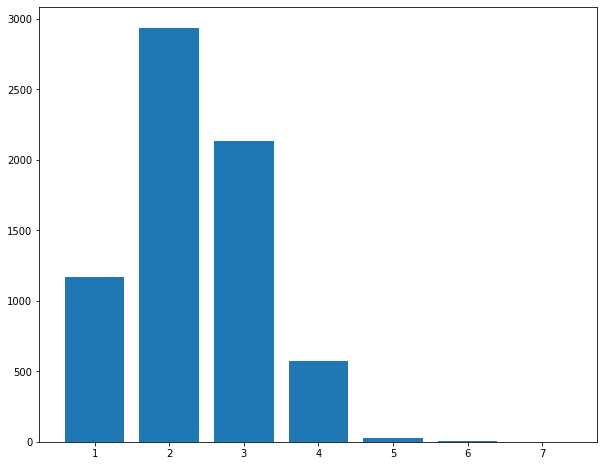

In [30]:
degrees_bike_paths = []
for node in nodes:
    degree = bike_paths.degree(node)
    degrees_bike_paths.append(degree)

plt.figure(figsize=[10,8])
from collections import Counter

degree_counts = Counter(degrees_bike_paths)
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())

plot_x = list(range(min_degree, max_degree + 1))
plot_y = [degree_counts.get(x, 0) for x in plot_x]

plt.bar(plot_x, plot_y)

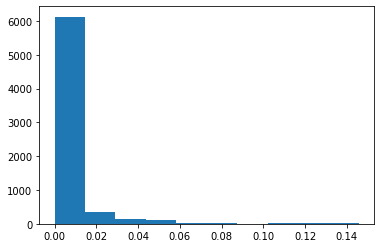

Highest betweeness node is 1003418


In [33]:
betweenness_bike_paths = nx.centrality.betweenness_centrality(bike_paths)
highest_betweenness_node_bike_paths = max(bike_paths.nodes, key=betweenness_bike_paths.get)
plt.hist(betweenness_bike_paths.values())
plt.show()

print(f"Highest betweeness node is {highest_betweenness_node_bike_paths}")

In [36]:
Gcc = sorted(nx.connected_components(bike_paths), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

eccentricity_bike_paths  = nx.algorithms.distance_measures.eccentricity(G0)
highest_eccentricity_node_bike_paths  = max(G0.nodes, key=eccentricity_bike_paths.get)
highest_eccentricity_node_bike_paths 

1000134

## Tylko wszystkie drogi (zielone)

In [ ]:
# G_all_roads = G_streets[G_streets['type'] == 'all_road'] # zielony
G_all_roads = nx.Graph(((u, v, e) for u,v,e in G.edges(data=True) if e['type'] == 'all_road'))
G_all_roads

In [ ]:
edges_all_roads = G_all_roads.edges()
print(f"Liczba krawędzi {len(edges_all_roads)}")
nodes_all_roads = G_all_roads.nodes()
print(f"Liczba wierzchołków {len(nodes_all_roads)}")
print(f"Liczba komponentów: {nx.number_connected_components(G_all_roads)}")

In [ ]:
degrees_all_roads  = []
for node in nodes_all_roads :
    degree = G_all_roads.degree(node)
    degrees_all_roads.append(degree)

plt.figure(figsize=[10,8])
from collections import Counter

degree_counts = Counter(degrees_all_roads)
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())

plot_x = list(range(min_degree, max_degree + 1))
plot_y = [degree_counts.get(x, 0) for x in plot_x]

plt.bar(plot_x, plot_y)

In [ ]:
betweenness_all_roads = nx.centrality.betweenness_centrality(G_all_roads)
highest_betweenness_node_all_roads = max(bike_paths.nodes, key=betweenness_all_roads.get)
plt.hist(betweenness_all_roads.values())
plt.show()

print(f"Highest betweeness node is {highest_betweenness_node_all_roads}")

In [ ]:
Gcc = sorted(nx.connected_components(G_all_roads), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

eccentricity_all_roads = nx.algorithms.distance_measures.eccentricity(G0)
highest_eccentricity_node_all_roads  = max(G0.nodes, key=eccentricity_all_roads.get)
highest_eccentricity_node_all_roads 

## Tylko nowo dodane sciezki

In [ ]:
# G_bike = G_streets[G_streets.get('additional') == 'new_bike_path'] # niebieski
G_new_bike_paths = nx.Graph(((u, v, e) for u,v,e in G.edges(data=True) if e['additional'] == 'new_bike_path'))
G_new_bike_paths = nx.Graph(((u, v, e) for u,v,e in G.edges(data=True) if e.get('additional') == 'new_bike_path'))
G_new_bike_paths

In [ ]:
edges_new_bike_paths = G_new_bike_paths.edges()
print(f"Liczba krawędzi {len(edges_new_bike_paths)}")
nodes_new_bike_paths = G_new_bike_paths.nodes()
print(f"Liczba wierzchołków {len(nodes_new_bike_paths)}")
print(f"Liczba komponentów: {nx.number_connected_components(G_new_bike_paths)}")

In [ ]:
degrees_new_bike_paths = []
for node in nodes_new_bike_paths:
    degree = G_new_bike_paths.degree(node)
    degrees_new_bike_paths.append(degree)

plt.figure(figsize=[10,8])
from collections import Counter

degree_counts = Counter(degrees_new_bike_paths)
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())

plot_x = list(range(min_degree, max_degree + 1))
plot_y = [degree_counts.get(x, 0) for x in plot_x]

plt.bar(plot_x, plot_y)

In [ ]:
betweenness_new_bike_paths = nx.centrality.betweenness_centrality(G_new_bike_paths)
highest_betweenness_node_new_bike_paths = max(bike_paths.nodes, key=betweenness_new_bike_paths.get)
plt.hist(betweenness_new_bike_paths.values())
plt.show()

print(f"Highest betweeness node is {highest_betweenness_node_new_bike_paths}")

In [ ]:
Gcc = sorted(nx.connected_components(G_new_bike_paths), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])

eccentricity_new_bike_paths = nx.algorithms.distance_measures.eccentricity(G0)
highest_eccentricity_node_new_bike_paths  = max(G0.nodes, key=eccentricity_new_bike_paths.get)
highest_eccentricity_node_new_bike_paths